# ISE529 Predictive Analytics
**Homework #1**

**Student Name:** `André Ramolivaz` <br>
**NetID:** `3933665317` <br>
**Due Date:** `2025-06-02`

### Setup
Import all required packages below.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

### Helper Functions
Define any utility functions here.

---
## Question 1
*20 points*
![Logo Python](1.png)


**(a)** Better for a flexible method. <br>

**Explanation:** With plenty of observations, the variance component of a flexible model shrinks (see the test-MSE U-shape and bias–variance slides 37-39 in Predictive Modeling). Low variance plus its intrinsically low bias let a flexible method capture subtle patterns that an inflexible model, constrained to high bias, would miss. Over-fitting risk is minimal because the data vastly outnumber the parameters.

**(b)** Worse for a flexible method. <br>

**Explanation:** Slides on overfitting and high-dimensional settings (same section) show that when predictors greatly outnumber observations, flexible models explode in variance: they can match the training noise exactly but generalize poorly. Inflexible methods impose structure, trading a bit of bias for a big cut in variance, and so deliver lower expected test error.

**(c)** Better for a flexible method.

**Explanation**: The regression-extensions slides (interaction terms, polynomials, splines; slides 50-54 in Linear Regression II) emphasize that inflexible models assume linearity and incur large bias under true non-linearity. Flexible approaches adapt to curvature and interactions, reducing bias enough to offset their higher variance, and thus achieve lower prediction error.

**(d)** Worse for a flexible method.

**Explanation** In the test-MSE decomposition (slides 43-45 in Predictive Modeling), the irreducible error $\sigma ^2$
  is fixed. When it is large, any model’s predictions are noisy; a flexible method’s extra variance compounds this noise and amplifies overfitting, while an inflexible model’s stronger assumptions damp the variance component. Hence the inflexible approach is more robust when the data are inherently noisy.


---
## Question 2
*25 points*
![Logo Python](2.png)

**(a)**

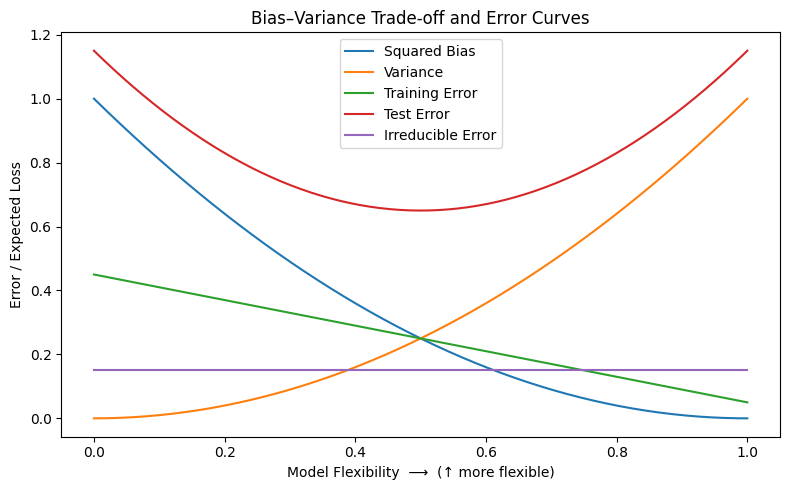

In [3]:
# Synthetic flexibility axis
x = np.linspace(0, 1, 200)  # 0 = very inflexible, 1 = very flexible

# Curves (arbitrary smooth shapes that match the canonical theory picture)
bias_sq = (1 - x)**2                   # Squared bias: high when inflexible, low when flexible
variance = x**2                        # Variance: low when inflexible, high when flexible
irreducible = np.full_like(x, 0.15)    # Irreducible error: flat horizontal line

training_error = 0.4 * (1 - x) + 0.05  # Training error: declines monotonically
test_error = bias_sq + variance + irreducible  # Test error: U‑shaped

# Plot
plt.figure(figsize=(8, 5))
plt.plot(x, bias_sq, label="Squared Bias")
plt.plot(x, variance, label="Variance")
plt.plot(x, training_error, label="Training Error")
plt.plot(x, test_error, label="Test Error")
plt.plot(x, irreducible, label="Irreducible Error")
plt.xlabel("Model Flexibility  ⟶  (↑ more flexible)")
plt.ylabel("Error / Expected Loss")
plt.title("Bias–Variance Trade‑off and Error Curves")
plt.legend()
plt.tight_layout()
plt.show()

**(b)** As we move from rigid to highly flexible models, the bias in the fitted function falls because a richer function class can approximate the true 𝑓(𝑋) more closely; hence the squared-bias curve slopes downward. That same additional flexibility, however, makes the fitted model much more sensitive to the idiosyncrasies of a particular training set, so the sampling variability of the estimate rises: this gives the upward-sloping variance curve.

Training error declines monotonically for a simple reason: with every extra parameter or degree of freedom the model can fit the observed responses at least as well as before and often markedly better, so the training-error curve falls steadily.

Irreducible error—the variance of the noise term 𝜀 is determined by aspects of the data-generation process that no model can capture, so it appears as a flat horizontal line.

The test-error curve is the sum of squared bias, variance and irreducible error (slides 43–45 of Predictive Modeling): at the left edge it is high because bias dominates; at the right edge it is high because variance dominates; in between it reaches a minimum where the fall in bias is just balanced by the rise in variance. This combination produces the familiar U-shape that characterises the bias–variance trade-off.


**(c)** Let:  $
\hat f_{0} \equiv \hat f(x_{0}), \qquad
f_{0} \equiv f(x_{0}), \qquad
\mu_{0} \equiv \mathrm{E}_{\text{train}}[\hat f_{0}].
$

$u_{0}$ is the mean of the estimator at $x_0$.
Bias and variance are: $
\text{Bias}(\hat f_{0}) = \mu_{0}-f_{0},
\qquad
\text{Var}(\hat f_{0}) = \mathrm{E}[(\hat f_{0}-\mu_{0})^{2}].
$

$
\begin{aligned}
E[(f_{0}-\hat f_{0})^{2}]
    &= E\Big(
           \{(f_{0}-\mu_{0}) - (\hat f_{0}-\mu_{0})\}^{2}
       \Big)              \\[4pt]
    &= (f_{0}-\mu_{0})^{2}
       + E[(\hat f_{0}-\mu_{0})^{2}]
       - 2\,(f_{0}-\mu_{0})\,
         E[\hat f_{0}-\mu_{0}] \\[4pt]
    &= (f_{0}-\mu_{0})^{2} + \text{Var}(\hat f_{0}),
\end{aligned}
$

since $E[\hat f_{0}-\mu_{0}]=0$.
Replacing the first term with $\text{Bias}(\hat f_{0})^{2}$ proves the identity.

**Numerical check with an example**

We simulate repeated training sets from  $
Y = 2 + 3X + \varepsilon, \qquad
\varepsilon \sim \mathcal N(0,1),
$

estimate $\hat f(x_0)$ with simple linear regression, and compare empirical
$E[(f-\hat f)^2]$ to $\text{Var}+\text{Bias}^2$.





In [7]:
rng       = np.random.default_rng(2025)   # set.seed(2025)
x0        = 1.5
f0        = 2 + 3 * x0                    # true f(x0)
n_train   = 30
n_rep     = 5000
ests      = np.empty(n_rep)

# --- 2  Monte-Carlo loop -----------------------------------------------------
for b in range(n_rep):
    x = rng.uniform(-1, 2, size=n_train)          # runif()
    y = 2 + 3 * x + rng.normal(size=n_train)      # rnorm()
    model = LinearRegression().fit(x.reshape(-1, 1), y)
    ests[b] = model.predict(np.array([[x0]]))[0]  # predict at x0

# --- 3  Bias, variance, decomposition ---------------------------------------
mu_hat  = ests.mean()
bias_sq = (mu_hat - f0)**2
var_hat = ests.var(ddof=1)             # sample variance (ddof = 1 like R's var)

lhs = np.mean((f0 - ests)**2)          # empirical E[(f - fhat)^2]
rhs = bias_sq + var_hat

# --- 4  Results table --------------------------------------------------------
out = pd.DataFrame({
    "Quantity": ["Empirical  E[(f - fhat)^2]", "Var(fhat) + Bias^2"],
    "Value":    [lhs, rhs]
}).round(4)

print(out.to_string(index=False))

                  Quantity  Value
Empirical  E[(f - fhat)^2] 0.0816
        Var(fhat) + Bias^2 0.0816
